<img src="http://www.imagens.usp.br/wp-content/uploads/EP.jpg" alt="logo" width="200"/>

# Atividade 3 - California House Pricing
### Atividade a ser entregue à disciplina PMR3508 - Aprendizado de Máquina e Reconhecimento de Padrões 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [4]:
trainY = train.median_house_value 
train = train.drop(columns=["median_house_value"])
train.shape

(14448, 9)

### Em nosso Dataset, temos os seguintes features:
* Id - Identificação dos locais
* latitude: Latitude do local (em graus)
* longitude: Longitude do local
* median_age: Mediana das idades dos imóveis no local
* total_rooms: Contagem do número de cômodos das casas na região
* total_bedrooms: Contagem do total de quartos das casas na região
* population: População na região
* households: Número total de casas na região
* median_income: Mediana da renda das pessoas na região
* median_house_value: Variável Target.

#### Além dessas features, uma análise qualitativa da situação faz com que novas features como _"persons/room" = population/total_bedroom e _"persons/bedroom" = population/total_rooms possam ser úteis.  Como será explorado abaixo na Engenharia de Features

## Engenharia de Features:

In [5]:
train["persons/room"] = train["population"]/train["total_rooms"]
test["persons/room"] = test["population"]/test["total_rooms"]
train["persons/room"]

0        0.550672
1        0.618540
2        0.717520
3        0.559091
4        0.701872
5        0.405300
6        0.557412
7        0.481848
8        0.449453
9        0.395513
10       0.468070
11       0.541255
12       0.570258
13       0.467226
14       1.099237
15       0.790084
16       0.730706
17       0.503289
18       0.734375
19       0.962963
20       0.400611
21       0.435028
22       0.479927
23       0.804899
24       0.515190
25       0.348081
26       0.378490
27       0.626168
28       0.799746
29       0.592666
           ...   
14418    0.412235
14419    1.597183
14420    0.521481
14421    0.805383
14422    0.625201
14423    0.558211
14424    1.083081
14425    1.056277
14426    0.474369
14427    0.735664
14428    0.605141
14429    0.499722
14430    0.339088
14431    0.691881
14432    0.454040
14433    1.002480
14434    0.466158
14435    0.420051
14436    0.352941
14437    0.612397
14438    0.390018
14439    0.428392
14440    0.466476
14441    1.308864
14442    0

In [6]:
train["persons/bedroom"] = train["population"]/train["total_bedrooms"]
test["persons/bedroom"] = test["population"]/test["total_bedrooms"]
train["persons/bedroom"]

0        2.872611
1        2.517529
2        3.836842
3        2.201342
4        3.292793
5        1.956395
6        2.037438
7        2.506438
8        2.315091
9        1.500000
10       2.611336
11       2.646718
12       3.006479
13       1.845857
14       4.000000
15       3.389140
16       2.472222
17       2.029085
18       3.968889
19       3.640000
20       2.507431
21       1.833333
22       3.037114
23       2.905488
24       2.596491
25       2.196581
26       2.142487
27       3.190476
28       3.009569
29       3.646341
           ...   
14418    1.644938
14419    5.531707
14420    2.213836
14421    3.442478
14422    3.291549
14423    2.165563
14424    4.212264
14425    5.758112
14426    2.737307
14427    3.453846
14428    2.760586
14429    3.101724
14430    1.836930
14431    2.439080
14432    2.435780
14433    4.826866
14434    2.243958
14435    1.918841
14436    2.090164
14437    3.266932
14438    2.180253
14439    2.316576
14440    2.987156
14441    4.228188
14442    2

## Análise de Features:
####     Abaixo será realizada uma análise qualitativa da distribuição das features na base com histogramas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6de67c9210>,
      dtype=object)

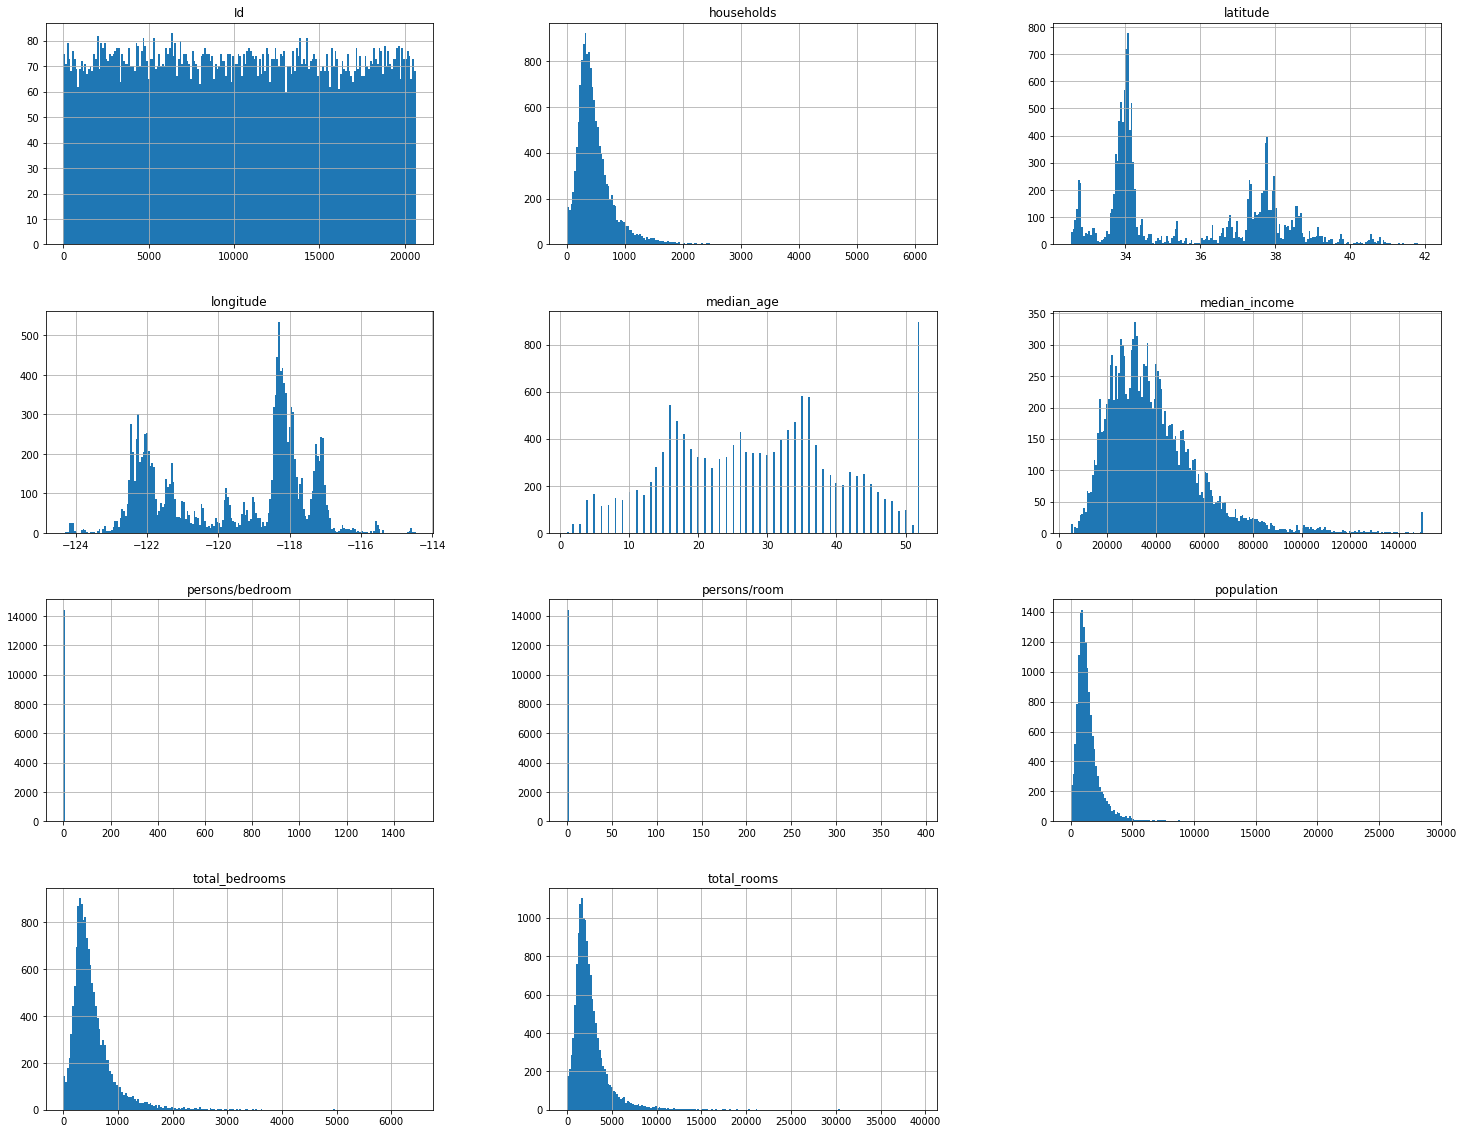

In [7]:
train.hist(bins=200, figsize=(25,20))

Com a análise dos histogramas, fica evidente que a *feature* **Id** não apresenta relevância alguma na regressão, portanto esta será removida

In [8]:
train = train.drop(columns=["Id"])

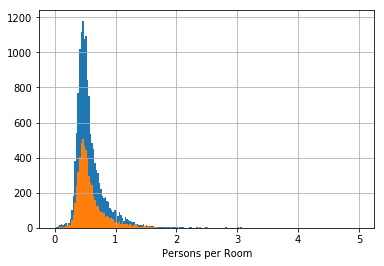

In [9]:
plt.xlabel('Persons per Room')
train["persons/room"].hist(bins=200, range=(0,5))
test["persons/room"].hist(bins=200, range=(0,5))

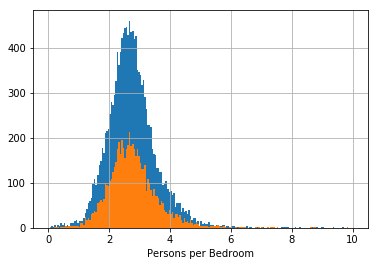

In [10]:
plt.xlabel('Persons per Bedroom')
train["persons/bedroom"].hist(bins=200, range=(0,10))
test["persons/bedroom"].hist(bins=200, range=(0,10))

## Modelos de Regressor:

### Árvore de Regressão

In [11]:
from sklearn import tree
regression_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, min_samples_leaf=1, max_depth=3, min_weight_fraction_leaf=0.0,  min_impurity_decrease=0.0, presort=False)
model = regression_tree.fit(train, trainY)
array = regression_tree.predict(train)
i=0
for number in array:
    if number == 500001:
        i=i+1
i

13998

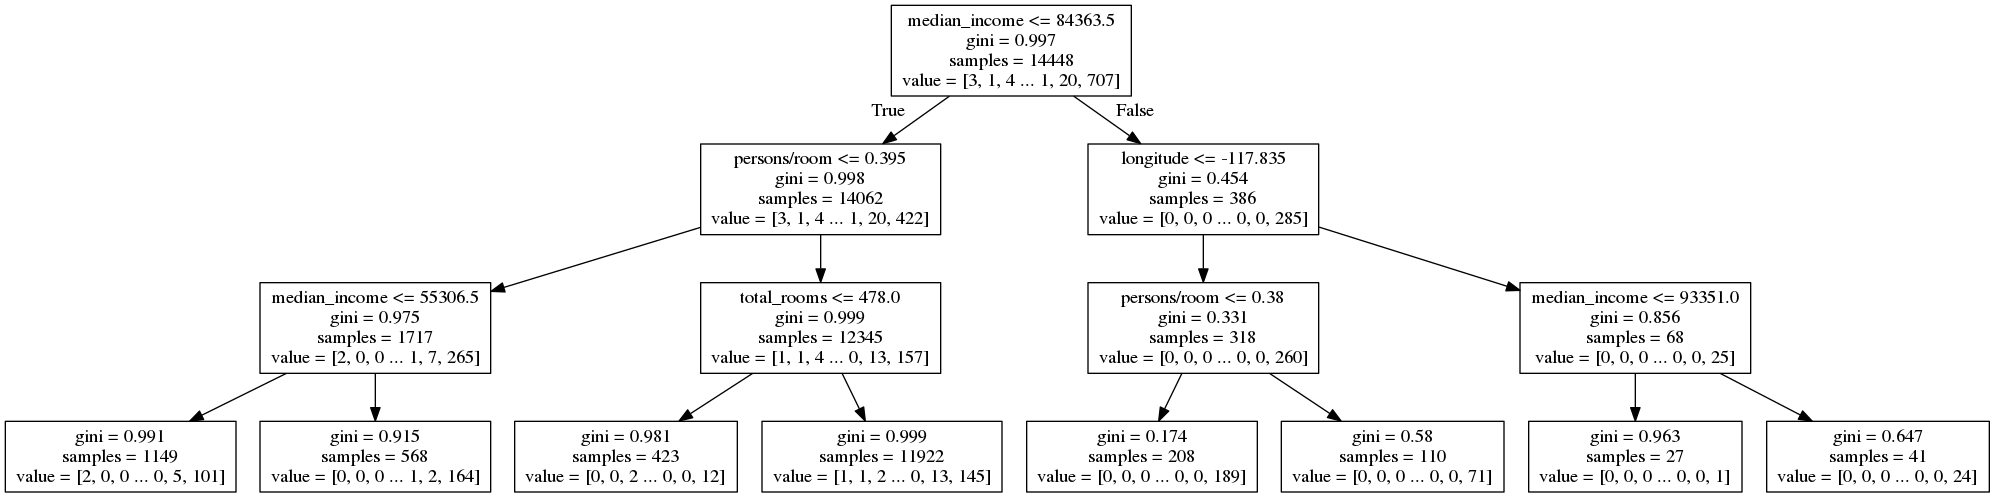

In [12]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(regression_tree, out_file=None, 
                                feature_names=train.columns)

graph = pydotplus.graph_from_dot_data(dot_data)  

# Mostrar grafo e salvar um pdf
graph.write_pdf("Tree.pdf")
Image(graph.create_png())

In [13]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


<Figure size 864x576 with 0 Axes>

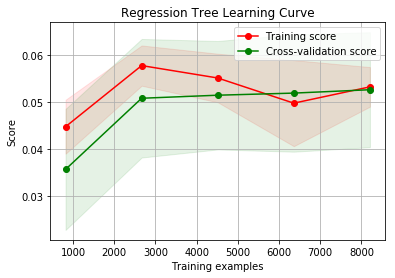

In [14]:
plt.figure(figsize=(12,8))
plot_learning_curve(regression_tree,"Regression Tree Learning Curve", train, trainY)

In [15]:
regression_tree.score(train, trainY)

0.049972314507198225

### Regressão Linear

In [16]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
LR.fit(train, trainY)
LR.score(train, trainY)

0.6388445527497901

In [17]:
# from sklearn.linear_model import LogisticRegression
# LogR = LogisticRegression(penalty='l1', dual=False, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, multi_class='warn', warm_start=False, n_jobs=None)
# LogR.fit(train, trainY)
# LogR.score(train, trainY)
# #LogR.sparsify()

<Figure size 864x576 with 0 Axes>

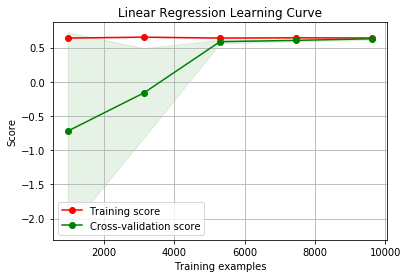

In [18]:
plt.figure(figsize=(12,8))
plot_learning_curve(LR,"Linear Regression Learning Curve", train, trainY)

In [19]:
testId = test["Id"]
test = test.drop(columns=["Id"])
predictions = LR.predict(test)
#predictions.to_csv('predictions.csv')
predictions

array([335344.74217462, 171426.35175678, 130660.45970078, ...,
       195878.68292049, 174910.85980175,  94474.92089336])

In [20]:
predict = pd.DataFrame(index=testId)
predict["median_house_value"] = predictions
predict.to_csv('predictions.csv')

In [21]:
from sklearn.ensemble import AdaBoostRegressor
boost = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
boost.fit(train, trainY)
boost.score(train, trainY)

0.4057948639521996

In [22]:
predictions = boost.predict(test)
predict = pd.DataFrame(index=testId)
predict["median_house_value"] = predictions
predict.to_csv('predictions.csv')

In [23]:
# linear_model.Lars([fit_intercept, verbose, …])
# linear_model.ElasticNetCV([l1_ratio, eps, …])
# linear_model.LogisticRegression([penalty, …])
# linear_model.LinearRegression([…]
# KNN, LASSO, RIDGE, arores de decisao
#GradientBoostingClassifier
                              
# sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, learning_rate='adaptive'
#                                     ,learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

## Neural Network: 
Dentre os parâmetros passados na criação da rede neural, temos:
* Função de ativação: Função Logistica (sigmoide)
* Otimização dos Pesos pela técnica de Gradiente Estocástico Descendente
* Expoente para diminuir taxa de aprendizado "power_t"
* max_iter: for stochastic solvers, is the number of epochs (how many times each data point will be used), not the number of gradient steps
* shuffle: Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.
* random_state: inicialização dos pesos e bias
* momentum: Momentum for gradient descent update


In [24]:
from sklearn import neural_network

neural_net = neural_network.MLPRegressor(hidden_layer_sizes=(50,),
                                       activation='relu', solver='adam',
                                       learning_rate='adaptive', max_iter=800,
                                       learning_rate_init=0.01, warm_start = True, alpha=0.01)
neural_net.fit(train, trainY)

print "Neural Net score: " + str(neural_net.score(train, trainY)*100) + "%"

AdaBoost model score: 63.21564771470356%
Neural Net score: 63.93368964354727%


<Figure size 864x576 with 0 Axes>

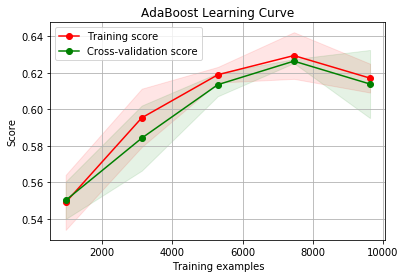

In [25]:
plt.figure(figsize=(12,8))
plot_learning_curve(neural_net,"Neural Network Learning Curve", train, trainY)

In [26]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(loss_function='RMSE')
regressor.fit(train, trainY)
regressor.score(train, trainY)
print regressor.tree_count_

0:	learn: 231908.5260194	total: 67.1ms	remaining: 1m 7s
1:	learn: 225906.7955249	total: 82.7ms	remaining: 41.3s
2:	learn: 220067.1032721	total: 102ms	remaining: 34s
3:	learn: 214592.1953464	total: 122ms	remaining: 30.4s
4:	learn: 209272.9443412	total: 142ms	remaining: 28.2s
5:	learn: 204065.6373553	total: 157ms	remaining: 26s
6:	learn: 199088.4331050	total: 173ms	remaining: 24.5s
7:	learn: 194162.1894203	total: 189ms	remaining: 23.5s
8:	learn: 189357.7545648	total: 200ms	remaining: 22.1s
9:	learn: 184800.4727688	total: 218ms	remaining: 21.6s
10:	learn: 180428.4118964	total: 229ms	remaining: 20.6s
11:	learn: 176132.2589537	total: 237ms	remaining: 19.5s
12:	learn: 171943.2777320	total: 247ms	remaining: 18.7s
13:	learn: 167906.9573867	total: 254ms	remaining: 17.9s
14:	learn: 163944.0997837	total: 264ms	remaining: 17.3s
15:	learn: 160119.7412893	total: 274ms	remaining: 16.9s
16:	learn: 156497.7929489	total: 287ms	remaining: 16.6s
17:	learn: 153032.3110306	total: 304ms	remaining: 16.6s
18:	

152:	learn: 56246.3339009	total: 1.28s	remaining: 7.11s
153:	learn: 56123.9708360	total: 1.3s	remaining: 7.12s
154:	learn: 56074.8199820	total: 1.3s	remaining: 7.12s
155:	learn: 56011.1126046	total: 1.31s	remaining: 7.1s
156:	learn: 55923.3775601	total: 1.32s	remaining: 7.08s
157:	learn: 55860.7266408	total: 1.32s	remaining: 7.06s
158:	learn: 55787.6235170	total: 1.33s	remaining: 7.04s
159:	learn: 55744.2408809	total: 1.34s	remaining: 7.02s
160:	learn: 55672.3368307	total: 1.34s	remaining: 7s
161:	learn: 55641.2773681	total: 1.35s	remaining: 6.98s
162:	learn: 55601.3960540	total: 1.35s	remaining: 6.96s
163:	learn: 55547.7164023	total: 1.36s	remaining: 6.94s
164:	learn: 55519.1991100	total: 1.37s	remaining: 6.93s
165:	learn: 55488.5103067	total: 1.38s	remaining: 6.92s
166:	learn: 55444.7724869	total: 1.38s	remaining: 6.89s
167:	learn: 55426.6407303	total: 1.39s	remaining: 6.88s
168:	learn: 55372.8054163	total: 1.39s	remaining: 6.86s
169:	learn: 55343.9548925	total: 1.4s	remaining: 6.84s

310:	learn: 51184.7046420	total: 2.28s	remaining: 5.05s
311:	learn: 51176.7660972	total: 2.29s	remaining: 5.04s
312:	learn: 51156.1087488	total: 2.29s	remaining: 5.04s
313:	learn: 51135.5981495	total: 2.3s	remaining: 5.03s
314:	learn: 51126.3725952	total: 2.31s	remaining: 5.02s
315:	learn: 51114.6588794	total: 2.31s	remaining: 5.01s
316:	learn: 51078.4055482	total: 2.32s	remaining: 5s
317:	learn: 51042.7430388	total: 2.33s	remaining: 4.99s
318:	learn: 51018.9705702	total: 2.33s	remaining: 4.98s
319:	learn: 51018.9189824	total: 2.34s	remaining: 4.96s
320:	learn: 51018.8802003	total: 2.34s	remaining: 4.95s
321:	learn: 51009.8179049	total: 2.35s	remaining: 4.94s
322:	learn: 51009.8092587	total: 2.35s	remaining: 4.92s
323:	learn: 51008.7845303	total: 2.35s	remaining: 4.9s
324:	learn: 50997.3320046	total: 2.36s	remaining: 4.89s
325:	learn: 50973.0045495	total: 2.36s	remaining: 4.88s
326:	learn: 50955.1313202	total: 2.37s	remaining: 4.88s
327:	learn: 50935.7114939	total: 2.38s	remaining: 4.8

483:	learn: 48561.9111819	total: 3.27s	remaining: 3.49s
484:	learn: 48538.4416039	total: 3.28s	remaining: 3.49s
485:	learn: 48514.5601126	total: 3.29s	remaining: 3.48s
486:	learn: 48514.4795309	total: 3.3s	remaining: 3.47s
487:	learn: 48502.9065692	total: 3.3s	remaining: 3.46s
488:	learn: 48502.8759949	total: 3.31s	remaining: 3.45s
489:	learn: 48477.9424647	total: 3.31s	remaining: 3.45s
490:	learn: 48470.1520437	total: 3.32s	remaining: 3.44s
491:	learn: 48470.1234246	total: 3.32s	remaining: 3.43s
492:	learn: 48462.8938117	total: 3.33s	remaining: 3.42s
493:	learn: 48454.3766571	total: 3.33s	remaining: 3.41s
494:	learn: 48433.1544828	total: 3.34s	remaining: 3.41s
495:	learn: 48430.6101336	total: 3.35s	remaining: 3.4s
496:	learn: 48420.3365024	total: 3.35s	remaining: 3.39s
497:	learn: 48412.0737217	total: 3.36s	remaining: 3.38s
498:	learn: 48399.9101884	total: 3.36s	remaining: 3.38s
499:	learn: 48399.6136816	total: 3.37s	remaining: 3.37s
500:	learn: 48393.1789020	total: 3.37s	remaining: 3

657:	learn: 47067.5745198	total: 4.25s	remaining: 2.21s
658:	learn: 47067.5194749	total: 4.25s	remaining: 2.2s
659:	learn: 47062.4502443	total: 4.26s	remaining: 2.19s
660:	learn: 47051.4892643	total: 4.27s	remaining: 2.19s
661:	learn: 47040.9894154	total: 4.27s	remaining: 2.18s
662:	learn: 47021.0097778	total: 4.28s	remaining: 2.18s
663:	learn: 47013.8017633	total: 4.29s	remaining: 2.17s
664:	learn: 47013.5789251	total: 4.29s	remaining: 2.16s
665:	learn: 47005.5449031	total: 4.3s	remaining: 2.15s
666:	learn: 46997.1351204	total: 4.3s	remaining: 2.15s
667:	learn: 46987.9734986	total: 4.31s	remaining: 2.14s
668:	learn: 46987.7599621	total: 4.31s	remaining: 2.13s
669:	learn: 46969.2081932	total: 4.32s	remaining: 2.13s
670:	learn: 46963.5035194	total: 4.32s	remaining: 2.12s
671:	learn: 46951.4650305	total: 4.33s	remaining: 2.11s
672:	learn: 46947.8862907	total: 4.34s	remaining: 2.11s
673:	learn: 46947.8860095	total: 4.34s	remaining: 2.1s
674:	learn: 46947.8525656	total: 4.34s	remaining: 2.

819:	learn: 45877.2851227	total: 5.21s	remaining: 1.14s
820:	learn: 45877.2305406	total: 5.22s	remaining: 1.14s
821:	learn: 45873.3805321	total: 5.23s	remaining: 1.13s
822:	learn: 45862.9353774	total: 5.24s	remaining: 1.13s
823:	learn: 45849.1813782	total: 5.24s	remaining: 1.12s
824:	learn: 45840.0750633	total: 5.25s	remaining: 1.11s
825:	learn: 45837.4426050	total: 5.26s	remaining: 1.11s
826:	learn: 45832.8219572	total: 5.26s	remaining: 1.1s
827:	learn: 45823.8813403	total: 5.27s	remaining: 1.09s
828:	learn: 45816.5282794	total: 5.28s	remaining: 1.09s
829:	learn: 45810.5669437	total: 5.28s	remaining: 1.08s
830:	learn: 45796.5185974	total: 5.29s	remaining: 1.07s
831:	learn: 45794.0478241	total: 5.29s	remaining: 1.07s
832:	learn: 45786.3020847	total: 5.3s	remaining: 1.06s
833:	learn: 45780.4497158	total: 5.31s	remaining: 1.06s
834:	learn: 45768.1734003	total: 5.31s	remaining: 1.05s
835:	learn: 45766.9900436	total: 5.32s	remaining: 1.04s
836:	learn: 45761.3159086	total: 5.33s	remaining: 

985:	learn: 44939.6777539	total: 6.18s	remaining: 87.7ms
986:	learn: 44931.1647670	total: 6.19s	remaining: 81.5ms
987:	learn: 44928.5936875	total: 6.2s	remaining: 75.3ms
988:	learn: 44924.3653533	total: 6.2s	remaining: 69ms
989:	learn: 44924.1851156	total: 6.21s	remaining: 62.7ms
990:	learn: 44917.9980251	total: 6.21s	remaining: 56.4ms
991:	learn: 44916.1372118	total: 6.22s	remaining: 50.2ms
992:	learn: 44915.8881925	total: 6.22s	remaining: 43.9ms
993:	learn: 44915.8876263	total: 6.22s	remaining: 37.6ms
994:	learn: 44910.4260717	total: 6.23s	remaining: 31.3ms
995:	learn: 44905.6024059	total: 6.24s	remaining: 25.1ms
996:	learn: 44900.6948307	total: 6.24s	remaining: 18.8ms
997:	learn: 44900.5219844	total: 6.25s	remaining: 12.5ms
998:	learn: 44895.2699920	total: 6.25s	remaining: 6.26ms
999:	learn: 44889.7583165	total: 6.26s	remaining: 0us
1000


# Random Forest:

In [29]:
from sklearn.ensemble import RandomForestRegressor
num=100
forest = RandomForestRegressor(n_estimators=num, criterion='mse', min_samples_split=5, 
                      min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features="sqrt", 
                     random_state=None, verbose=0, warm_start=True)
forest.fit(train, trainY)
print forest.score(train, trainY)
predictions = forest.predict(test)

0.8948819242116396


<Figure size 864x576 with 0 Axes>

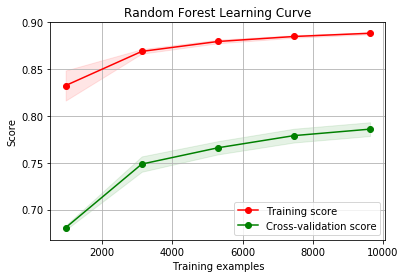

In [33]:
plt.figure(figsize=(12,8))
plot_learning_curve(forest,"Random Forest Learning Curve", train, trainY)

# Boosting:

* Gradient Boosting Regressor:

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
boosting = GradientBoostingRegressor()
# boosting = GradientBoostingClassifier(loss='deviance', learning_rate=0.02, n_estimators=100, subsample=1.0, 
#                                       criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
#                                       min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
#                                       min_impurity_split=None, init=forest, random_state=None, max_features=None,
#                                       verbose=0, max_leaf_nodes=None, warm_start=True, presort='auto',
#                                       validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)



boosting.fit(train, trainY)
print boosting.score(train, trainY)

predictions = boosting.predict(test)

0.8107527445925378


<Figure size 864x576 with 0 Axes>

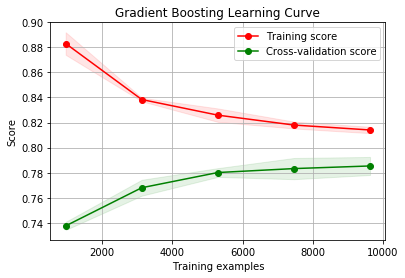

In [34]:
plt.figure(figsize=(12,8))
plot_learning_curve(boosting,"Gradient Boosting Learning Curve", train, trainY)

In [ ]:
predict = pd.DataFrame(index=testId)
predict["median_house_value"] = predictions
predict.to_csv('predictions.csv')

* AdaBoost Regressor:

In [36]:
from sklearn.ensemble import AdaBoostRegressor
adaboost1 = AdaBoostRegressor(base_estimator=neural_net, n_estimators=10, learning_rate=0.01, random_state=None)
adaboost2 = AdaBoostRegressor(base_estimator=forest, n_estimators=10, learning_rate=0.01, random_state=None)


adaboost1.fit(train, trainY)
adaboost2.fit(train, trainY)

print "AdaBoost on Neural Network score: " + str(adaboost1.score(train, trainY)*100) + "%"
print "AdaBoost on Random Forest score: " + str(adaboost2.score(train, trainY)*100) + "%"

AdaBoost on Neural Network score: 63.622773021371714%
AdaBoost on Random Forest score: 63.622773021371714%


# Submissão do arquivo gerado pelo classificador com melhor performace:

In [38]:
predictions = adaboost2.predict(test)
predict = pd.DataFrame(index=testId)
predict["median_house_value"] = predictions
predict.to_csv('predictions.csv')

In [28]:
predictions = adaboost.predict(test)
print(predictions)
predict = pd.DataFrame(index=testId)
predict["median_house_value"] = predictions
predict.to_csv('predictions.csv')

[344507.53270836 173363.52792838 120718.32546794 ... 211906.98384355
 167574.26223803  98141.86978882]
